In [1]:
%matplotlib inline

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.optimize as opt
import math

In [21]:
data = loadmat('data/ex3data1.mat')
weights = loadmat('data/ex3weights.mat')

In [5]:
X = data['X']
y = data['y']

In [24]:
theta1 = weights['Theta1']
theta2 = weights['Theta2']

In [27]:
theta1.shape

(25, 401)

In [50]:
theta2.shape

(10, 26)

In [97]:
def visualizeData(X):
    m,n = X.shape
    example_width = round(math.sqrt(n))
    example_height = round(n/example_width)
    display_rows = math.floor(math.sqrt(m))
    display_cols = math.ceil(m/display_rows)
    pad = 1
    curr_ex = 0
    
    display_array = np.ones(( (pad+display_rows*(example_height + pad)), (pad + display_cols*(example_width + pad))))
    for i in range(1, display_rows +1):
        for j in range(1, display_cols + 1):
            if (curr_ex >=m):
                break
            else:
                max_val = max(abs(X[curr_ex]))
                display_array[pad + (i-1)*(example_height+pad): i*(example_height+pad), pad + (j-1)*(example_width + pad): j*(example_width + pad)] = X[curr_ex].reshape(example_height, example_width)/max_val
                curr_ex+=1
        if (curr_ex>=m):
            break
    plt.imshow(display_array, cmap='gray')
    plt.axis('off')
    plt.show()
    
    

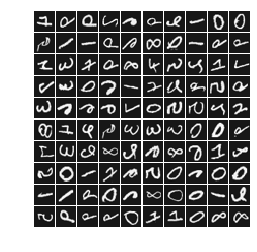

In [98]:
random_select = np.random.randint(0,4999,100)  #100 random indices
random_input = X[random_select]             #100 random training examples to plot
visualizeData(random_input)

In [30]:
def sigmoid(Z):
    sig = 1/(1+np.exp(-Z))
    return sig

## Prediction

In [88]:
def predict(theta1, theta2, X):
    m = X.shape[0]
    X = np.hstack((np.ones((X.shape[0],1)), X))
    pred = np.zeros((X.shape[0],1))
    num_of_labels = theta2.shape[0]
    a1 = sigmoid(np.dot(X, theta1.T))
    a1 = np.hstack((np.ones((a1.shape[0],1)), a1))
    hx = sigmoid(np.dot(a1, theta2.T))
    print(hx[0])
    pred = np.argmax(hx, axis =1) + 1  # plus is required since indexing starts from zero
    return pred

In [89]:
pred = predict(theta1, theta2, X)

[1.12661530e-04 1.74127856e-03 2.52696959e-03 1.84032321e-05
 9.36263860e-03 3.99270267e-03 5.51517524e-03 4.01468105e-04
 6.48072305e-03 9.95734012e-01]


In [93]:
pred[2000]

4

In [94]:
y[2000]

array([4], dtype=uint8)

## Accuracy

In [96]:
np.mean(np.double(pred == y.flatten()))  # flatten is required to compare p and y( since p is a list)

0.9752

In [39]:
theta1.shape

(25, 401)

In [40]:
theta2.shape

(10, 26)

In [48]:
np.ravel?